In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
mnist = tf.keras.datasets.mnist
(X, y), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.75)

In [5]:
model = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(1, 28, 28)), # reshape, conv2d expects 4 dims - batch size, height, width, and channels
    
    # Data Augmentation
    layers.RandomContrast(factor=0.1),
#     layers.RandomWidth(factor=0.15), # horizontal stretch
#     layers.RandomHeight(factor=0.15), # horizontal stretch

    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

#     # Block Three
#     layers.BatchNormalization(),
#     layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
#     layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
#     layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [9]:
from tensorflow.keras.utils import to_categorical

X_train_reshaped = np.expand_dims(X_train, axis=1)
X_valid_reshaped = np.expand_dims(X_valid, axis=1)

# Check the shape of the reshaped data
print("Original shape:", X_train.shape)
print("Reshaped shape:", X_train_reshaped.shape)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_valid_onehot = to_categorical(y_valid, num_classes=10)

Original shape: (45000, 28, 28)
Reshaped shape: (45000, 1, 28, 28)


2024-02-29 19:42:18.649929: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35280000 exceeds 10% of free system memory.


Epoch 1/5
1407/1407 [==============================] - 95s 66ms/step - loss: 0.0400 - binary_accuracy: 0.9904 - val_loss: 0.0165 - val_binary_accuracy: 0.9959
Epoch 2/5
1407/1407 [==============================] - 94s 67ms/step - loss: 0.0110 - binary_accuracy: 0.9975 - val_loss: 0.0111 - val_binary_accuracy: 0.9973
Epoch 3/5
1407/1407 [==============================] - 93s 66ms/step - loss: 0.0069 - binary_accuracy: 0.9985 - val_loss: 0.0098 - val_binary_accuracy: 0.9974
Epoch 4/5
1407/1407 [==============================] - 93s 66ms/step - loss: 0.0048 - binary_accuracy: 0.9991 - val_loss: 0.0093 - val_binary_accuracy: 0.9974
Epoch 5/5
1407/1407 [==============================] - 92s 65ms/step - loss: 0.0033 - binary_accuracy: 0.9994 - val_loss: 0.0085 - val_binary_accuracy: 0.9978


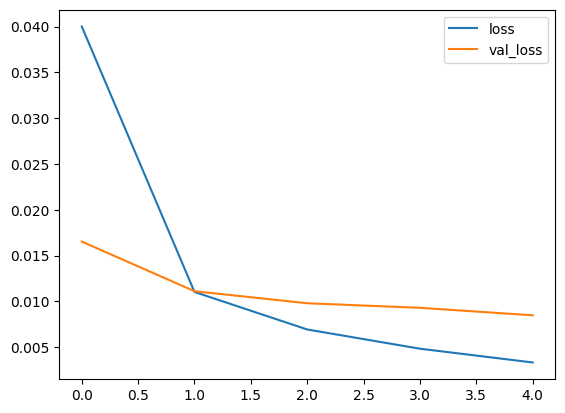

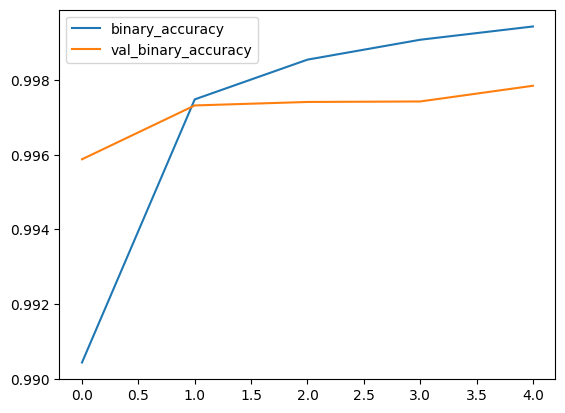

In [10]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    X_train_reshaped, y_train_onehot,
    validation_data=(X_valid_reshaped, y_valid_onehot),
    epochs=5,
)

# Plot learning curves
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [1]:
model.save(filepath='digit_recognizer_v2.keras', overwrite=True)

NameError: name 'model' is not defined

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 random_contrast (RandomCon  (None, 28, 28, 1)         0         
 trast)                                                          
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                        

: 

In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 random_contrast (RandomCon  (None, 28, 28, 1)         0         
 trast)                                                          
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                        

In [6]:
print(tf.__version__)

2.15.0


In [7]:
print(keras.__version__)

AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'